In [19]:
import numpy as np
import pandas as pd
!python3 -m pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/DAV Experiments/honeyproduction.csv")

In [5]:
df

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [7]:
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [8]:
#summary

df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
state,626,44,AL,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
numcol,626.0,NaN,NaN,NaN,60284.345048,91077.087231,2000.0,9000.0,26000.0,63750.0,510000.0
yieldpercol,626.0,NaN,NaN,NaN,62.009585,19.458754,19.0,48.0,60.0,74.0,136.0
totalprod,626.0,NaN,NaN,NaN,4169086.261981,6883846.751268,84000.0,475000.0,1533000.0,4175250.0,46410000.0
stocks,626.0,NaN,NaN,NaN,1318859.42492,2272963.665923,8000.0,143000.0,439500.0,1489500.0,13800000.0
priceperlb,626.0,NaN,NaN,NaN,1.409569,0.638599,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,NaN,NaN,NaN,4715741.214058,7976109.76856,162000.0,759250.0,1841500.0,4703250.0,69615000.0
year,626.0,NaN,NaN,NaN,2004.864217,4.317306,1998.0,2001.0,2005.0,2009.0,2012.0


In [9]:
# Printing basic info

print('Number of states included in the dataset: ', df['state'].nunique())
print('\n')
print('States that are included in the dataset: ', df['state'].unique())
print('\n')
print('Data is provided for: ', df['year'].nunique(), 'years')
print('Minimum year: ', df['year'].min())
print('Maximum year: ', df['year'].max())
print('\n')

Number of states included in the dataset:  44


States that are included in the dataset:  ['AL' 'AZ' 'AR' 'CA' 'CO' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA' 'KS' 'KY'
 'LA' 'ME' 'MD' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NJ' 'NM' 'NY' 'NC'
 'ND' 'OH' 'OK' 'OR' 'PA' 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI'
 'WY' 'SC']


Data is provided for:  15 years
Minimum year:  1998
Maximum year:  2012




In [11]:
# Q1: Finding state with Maximum Production

max_production = df.loc[df['totalprod'].idxmax()]
print('State with maximum production: \n\n', max_production)

State with maximum production: 

 state                  ND
numcol           510000.0
yieldpercol            91
totalprod      46410000.0
stocks         12995000.0
priceperlb            1.5
prodvalue      69615000.0
year                 2010
Name: 532, dtype: object


In [12]:
# Q2: Finding top 10 states with highest prod

top_10_production = df.nlargest(10, 'totalprod')
print('States with top 10 Highest Production: \n\n', top_10_production)

States with top 10 Highest Production: 

     state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
532    ND  510000.0           91  46410000.0  12995000.0        1.50   
3      CA  450000.0           83  37350000.0  12326000.0        0.62   
452    ND  400000.0           90  36000000.0   8640000.0        1.36   
492    ND  450000.0           77  34650000.0   7623000.0        1.38   
114    ND  300000.0          115  34500000.0  13800000.0        0.57   
329    ND  370000.0           91  33670000.0   8418000.0        0.83   
612    ND  480000.0           69  33120000.0   5962000.0        1.92   
572    ND  460000.0           71  32660000.0   7512000.0        1.67   
220    CA  480000.0           67  32160000.0   6432000.0        1.39   
411    ND  420000.0           74  31080000.0   9013000.0        0.96   

      prodvalue  year  
532  69615000.0  2010  
3    23157000.0  1998  
452  48960000.0  2008  
492  47817000.0  2009  
114  19665000.0  2000  
329  27946000.0  2005

In [13]:
# Q3: Fidning Bottom 5 States with lowest Prod

bottom_5_states = df.nsmallest(5, 'totalprod')
print('5 States with Least Production: \n\n', bottom_5_states)

5 States with Least Production: 

     state  numcol  yieldpercol  totalprod   stocks  priceperlb  prodvalue  \
233    MD  2000.0           42    84000.0  21000.0        1.93   162000.0   
561    ME  4000.0           30   120000.0  17000.0        1.98   238000.0   
601    ME  4000.0           34   136000.0  24000.0        2.39   325000.0   
189    MD  3000.0           46   138000.0  21000.0        1.96   270000.0   
247    OK  3000.0           47   141000.0  69000.0        1.84   259000.0   

     year  
233  2003  
561  2011  
601  2012  
189  2002  
247  2003  


In [15]:
# Q4: Finding States with maximum revenue

max_prodvalue_state = df.loc[df['prodvalue'].idxmax(), 'state']
print('State with Maximum Revenue', max_prodvalue_state)

State with Maximum Revenue ND


In [16]:
# Avg Production

avg_production_by_state = df.groupby('state')['totalprod'].mean()

avg_production_by_state = avg_production_by_state.sort_values(ascending=False)

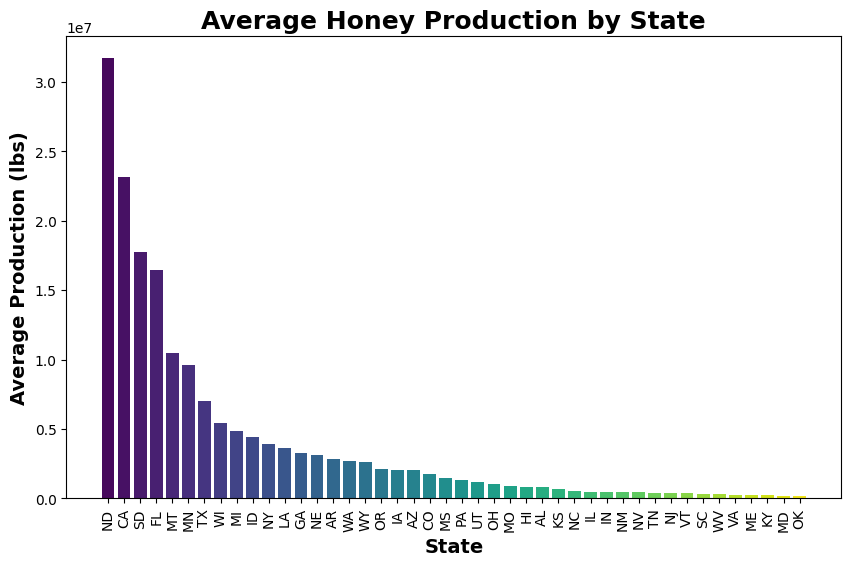

In [20]:
plt.figure(figsize=(10, 6))


colors = sns.color_palette("viridis", len(avg_production_by_state))

plt.bar(avg_production_by_state.index, avg_production_by_state.values, color=colors)


plt.title('Average Honey Production by State', fontsize=18, fontweight='bold')
plt.xlabel('State', fontsize=14, fontweight='bold')
plt.ylabel('Average Production (lbs)', fontsize=14, fontweight='bold')


plt.xticks(rotation=90)

plt.show()

In [23]:
max_revenue = (df['totalprod'] * df['priceperlb']).max()
print(f"Maximum Revenue: ${max_revenue:.2f}")


max_production_year = df.loc[df['totalprod'].idxmax()]['year']
print(f"Year with maximum production: {max_production_year}")

max_avg_price_state = df.groupby('state')['priceperlb'].mean().idxmax()
print(f"State with maximum average price per pound: {max_avg_price_state}")


max_yield_per_colony = df.loc[df['yieldpercol'].idxmax()]['yieldpercol']
print(f"Maximum Yield per Colony: {max_yield_per_colony} lbs")

Maximum Revenue: $69615000.00
Year with maximum production: 2010
State with maximum average price per pound: VA
Maximum Yield per Colony: 136 lbs


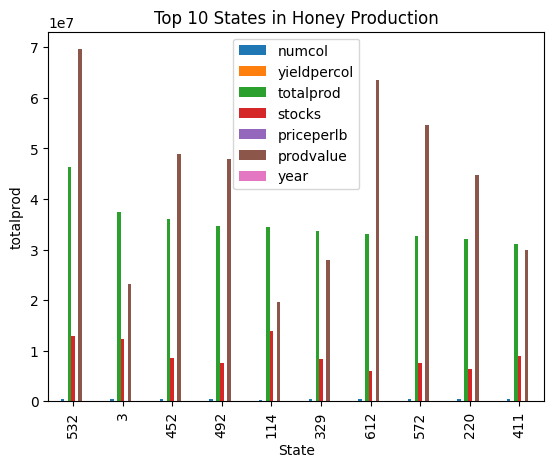

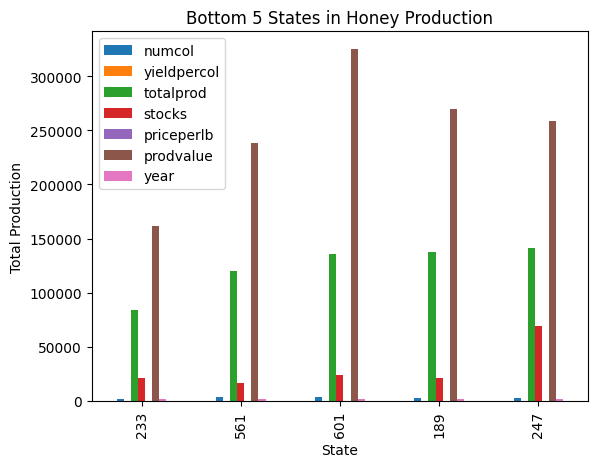

In [25]:
top_10_production.plot(kind='bar', title='Top 10 States in Honey Production')
plt.xlabel('State')
plt.ylabel('totalprod')
plt.show()


bottom_5_states.plot(kind='bar', title='Bottom 5 States in Honey Production')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.show()

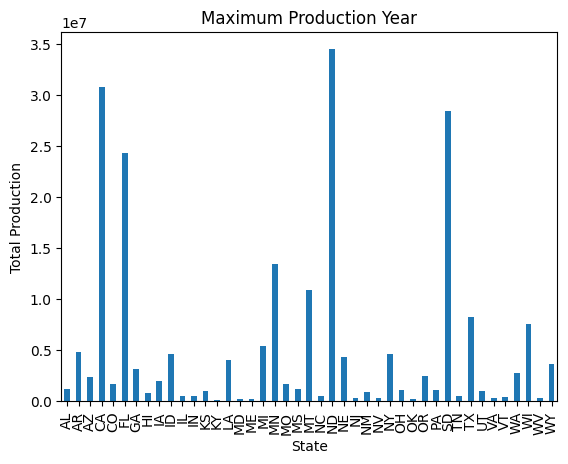

In [26]:
max_production_by_year = df.groupby('year')['totalprod'].sum().idxmax()
data_by_max_production_year = df[df['year'] == max_production_by_year]
data_by_max_production_year.groupby('state')['totalprod'].sum().plot(kind='bar', title='Maximum Production Year')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.show()

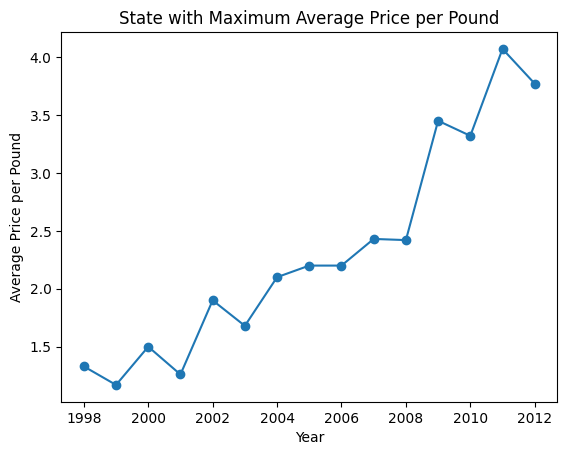

In [27]:
max_avg_price_state = df.groupby('state')['priceperlb'].mean().idxmax()
data_by_max_avg_price_state = df[df['state'] == max_avg_price_state]
data_by_max_avg_price_state.groupby('year')['priceperlb'].mean().plot(kind='line', marker='o', title='State with Maximum Average Price per Pound')
plt.xlabel('Year')
plt.ylabel('Average Price per Pound')
plt.show()

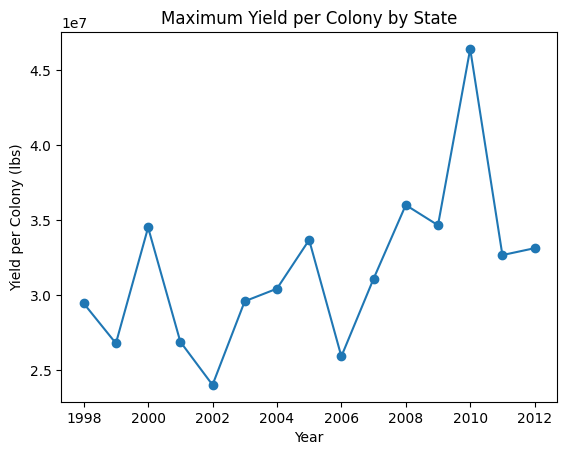

In [28]:
max_yield_per_colony = df.groupby('state')['totalprod'].mean().idxmax()
data_by_max_yield_per_colony = df[df['state'] == max_yield_per_colony]
data_by_max_yield_per_colony.groupby('year')['totalprod'].mean().plot(kind='line', marker='o', title='Maximum Yield per Colony by State')
plt.xlabel('Year')
plt.ylabel('Yield per Colony (lbs)')
plt.show()

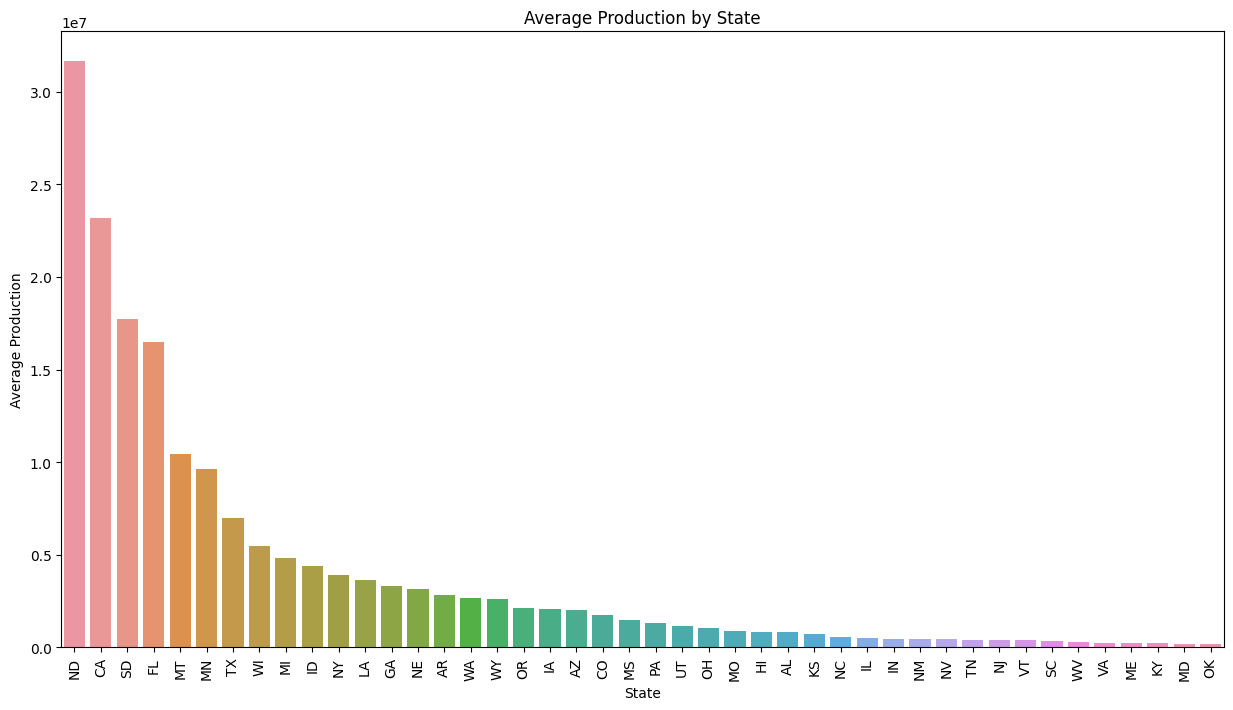

In [29]:
# Plotting all of em

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=avg_production_by_state.index, y=avg_production_by_state.values, ax=ax)
ax.set_title('Average Production by State')
ax.set_xlabel('State')
ax.set_ylabel('Average Production')
plt.xticks(rotation=90)
plt.show()